In [1]:
import numpy as np
import pandas
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from spsspro.algorithm import supervised_learning
import alepython
from alepython import ale_plot
import PyALE
from PyALE import ale
import random

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
#生成案例数据
data = pandas.read_csv("1%人口抽样调查数据.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#xgboost分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)

You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[[ 9.35715213e-02 -1.54681904e-02  2.48429971e-03 ...  1.53300753e-02
   4.24667913e-03  1.75964534e-02]
 [ 1.67824134e-01 -8.78423639e-03 -4.56312671e-02 ... -1.66035618e-03
   1.44353937e-04  1.44365234e-02]
 [-3.49513352e-01 -1.71013717e-02 -6.58568880e-03 ... -4.09022556e-04
   1.04898133e-03  9.59223416e-03]
 ...
 [-4.23324972e-01 -1.99122466e-02 -4.07690706e-04 ... -1.32353208e-03
   9.66798980e-05  1.33518968e-02]
 [ 4.34034109e-01 -9.91023704e-03  1.32525414e-02 ...  3.06853047e-03
   4.40698583e-03  1.08748609e-02]
 [-3.48201692e-01 -2.24047862e-02  3.54837184e-03 ...  1.28232013e-03
   1.86936266e-03  1.24506205e-02]]
.values =
array([[ 9.35715213e-02, -1.54681904e-02,  2.48429971e-03, ...,
         1.53300753e-02,  4.24667913e-03,  1.75964534e-02],
       [ 1.67824134e-01, -8.78423639e-03, -4.56312671e-02, ...,
        -1.66035618e-03,  1.44353937e-04,  1.44365234e-02],
       [-3.49513352e-01, -1.71013717e-02, -6.58568880e-03, ...,
        -4.09022556e-04,  1.04898133e-03, 

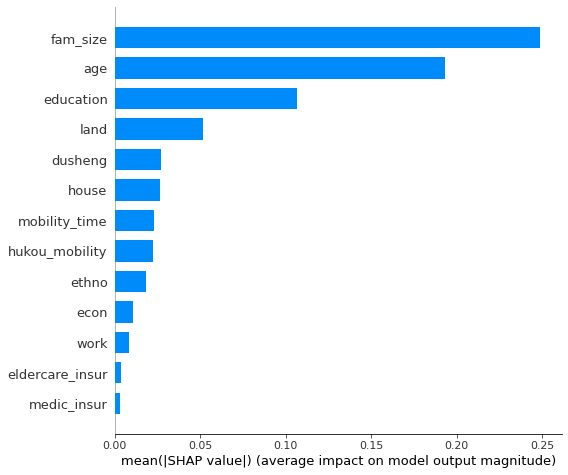

            feature  importance
0          fam_size    0.248794
1             house    0.026725
2              econ    0.010873
3               age    0.193072
4             ethno    0.018021
5    hukou_mobility    0.022380
6     mobility_time    0.022902
7              land    0.051853
8         education    0.106609
9              work    0.008527
10  eldercare_insur    0.003526
11      medic_insur    0.002905
12          dusheng    0.027297


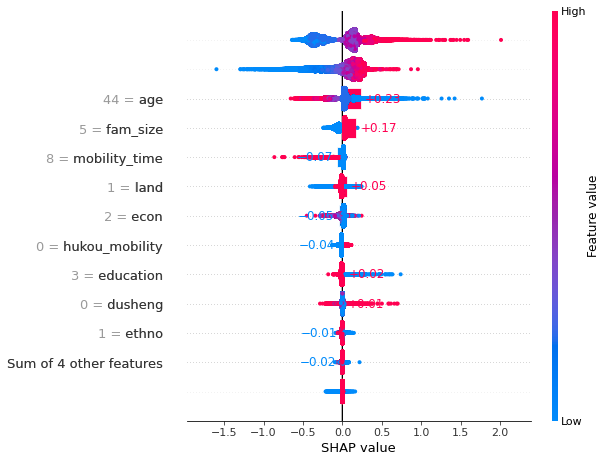

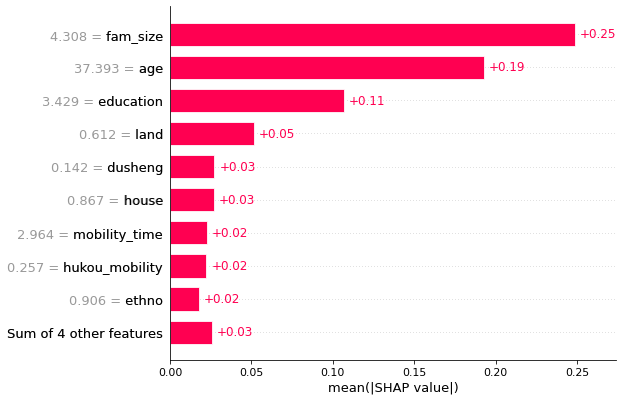

{'model_features': {'name': ['fam_size', 'house', 'econ', 'age', 'ethno', 'hukou_mobility', 'mobility_time', 'land', 'education', 'work', 'eldercare_insur', 'medic_insur', 'dusheng'], 'data': [0.21199999749660492, 0.0560000017285347, 0.01899999938905239, 0.20399999618530273, 0.04800000041723251, 0.03500000014901161, 0.02500000037252903, 0.12200000137090683, 0.18199999630451202, 0.017000000923871994, 0.008999999612569809, 0.012000000104308128, 0.05999999865889549]}, 'models_param': {'name': ['训练用时', '数据切分', '数据洗牌', '交叉验证', '基学习器', '基学习器数量', '学习率', 'L1正则项', 'L2正则项', '样本征采样率', '树特征采样率', '节点特征采样率', '叶子节点中样本的最小权重', '树的最大深度'], 'data': ['2.089s', 0.75, '否', '否', 'gbtree', 100, 0.1, 0, 1, 1, 1, 1, 0, 'None']}, 'evaluation_indicators': {'index': ['训练集', '测试集'], 'title': ['MSE', 'RMSE', 'MAE', 'MAPE', 'R²'], 'data': [[0.411, 0.641, 0.446, 33.509, 0.352], [0.417, 0.646, 0.45, 36.083, 0.341]]}, 'train_predict': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'title': ['预测训练集结果Y', 'ch

In [3]:
# SHAP分析
explainer = shap.TreeExplainer(result['model'])
shap_values = explainer.shap_values(data_x)
shap_values2 = explainer(data_x)
print(shap_values)
print(shap_values2)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")
plt.show()
#数值展示
feature_importance = pandas.DataFrame()

feature_importance['feature'] = data_x.columns

feature_importance['importance'] = np.abs(shap_values).mean(0)

feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

# 可视化
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="dot", show=False)
plt.savefig('shap_all.png',dpi=600)
#局部以及全局图
shap.plots.bar(shap_values2[1], show_data=True)
shap.plots.bar(shap_values2, show_data=True)
print(result)

In [ ]:
#队列条形图
sex = ["Women" if shap_values2[i,"gender"].data == 0 
       else "Men" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(sex).abs.mean(0))
# 假设 shap_values2 是 Explanation 对象，且 "age" 是特征列
year = ["90s" if shap_values2[i,"age"].data <= 32 
        else "70s" if shap_values2[i,"age"].data >= 43
       else "80s" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(year).abs.mean(0))

In [ ]:
#依赖图
shap.dependence_plot('reg_mobility', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_econ', shap_values, data_x, interaction_index=None)
shap.dependence_plot('work_hour', shap_values, data_x, interaction_index='fam_income')
shap.dependence_plot('reg_eduratio', shap_values, data_x, interaction_index=None)
shap.dependence_plot('education', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_medicare', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_childcare', shap_values, data_x, interaction_index=None)
shap.dependence_plot('internet', shap_values, data_x, interaction_index=None)
shap.dependence_plot('insurance', shap_values, data_x, interaction_index=None)

In [ ]:
#交互图
shap_interaction_values = explainer.shap_interaction_values(data_x)
shap.summary_plot(shap_interaction_values, data_x)
print(result)

In [ ]:
#ale图
plt.rc("figure", figsize=(9,6))
ale_plot(result['model'], data_x, 'age', monte_carlo=True)
ale_plot(result['model'], data_x, 'reg_mobility', monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["age","reg_mobility"], bins=10, monte_carlo=True)

In [ ]:
#一维线性
ale_plot(model=result['model'], train_set=data_x, features=["fam_size"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_svc"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["age"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_urgap"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_mobility"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_econ"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_eduratio"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["fam_income"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["education"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["work_hour"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["internet"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["social_trust"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["insurance"], bins=10, monte_carlo=True)

In [ ]:
#交叉图
plt.rc("figure", figsize=(16,9))
ale_plot(model=result['model'], train_set=data_x, features=["age","education"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["fam_income_rel","work_hour"], bins=10, monte_carlo=True)
ale_plot(model=result['model'], train_set=data_x, features=["reg_mobility","fam_income"], bins=10, monte_carlo=True)

In [ ]:
#ale图
## 1D - continuous - no CI
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_mobility"], grid_size=50, include_CI=False
)
plt.savefig('reg_mobility.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["fam_size"], grid_size=50, include_CI=False
)
plt.savefig('fam_size.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_svc"], grid_size=50, include_CI=False
)
plt.savefig('reg_svc',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["age"], grid_size=50, include_CI=False
)
plt.savefig('age.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_urgap"], grid_size=50, include_CI=False
)
plt.savefig('reg_urgap.png',dpi=600)
ale_eff = ale(
    X=data_x,model=result['model'], feature=["reg_econ"], grid_size=50, include_CI=False
)
plt.savefig('reg_econ.png',dpi=600)

In [ ]:
## 1D - continuous - with 95% CI
random.seed(123)
X_sample = data_x.loc[random.sample(data_x.index.to_list(), 1000), :]
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["reg_mobility"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["reg_eduratio"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["social_trust"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["work_hour"], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=result['model'], feature=["internet"], grid_size=50, include_CI=True, C=0.95
)

In [ ]:
#ale图
#离散ale1D
## 1D - discrete
ale_eff = ale(X=data_x, model=result['model'], feature=["education"])
ale_eff = ale(X=data_x, model=result["model"], feature=["insurance"])

In [ ]:
#2Dale图
ale_eff = ale(X=data_x,model=result['model'], feature=["age","education"], grid_size=100)
ale_eff = ale(X=data_x,model=result['model'], feature=["work_hour","fam_income_rel"], grid_size=100)